Work with the CodeProjectAI object detection API (YOLO). Note that by default, the minimum confidence for detected objects is 0.45

In [1]:
import codeprojectai.core as cpai
from PIL import Image
import pprint
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
IP = 'localhost'
PORT = '32168'
TIMEOUT = 20 # Default is 10
MIN_CONFIDENCE = 0.01 # Default is 0.45

## Object detection
Run with (in Windows): 
```
docker run --name CodeProject.AI-Server -d -p 32168:32168 ^
  --mount type=bind,source=C:\ProgramData\CodeProject\AI\docker\data,target=/etc/codeproject/ai ^\n
  --mount type=bind,source=C:\ProgramData\CodeProject\AI\docker\modules,target=/app/modules ^\n
  codeproject/ai-server"\n"
```
See [docs](https://www.codeproject.com/ai/docs/why/running_in_docker.html) for Linux and macOS instructions

In [3]:
cpaiobject = cpai.CodeProjectAIObject(ip=IP, port=PORT, timeout=TIMEOUT, min_confidence=MIN_CONFIDENCE)

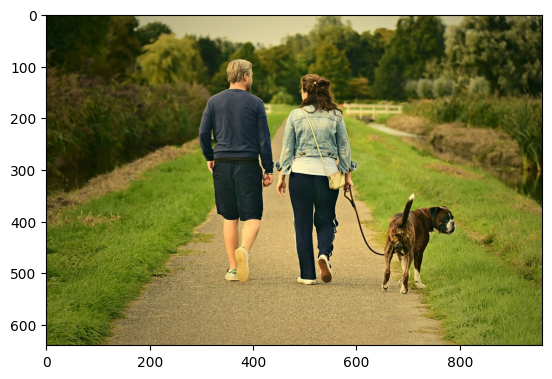

In [4]:
image_path = 'tests/images/test-image3.jpg'

plt.imshow(Image.open(image_path));

Perform object detection - can be slow

In [5]:
%%time
try:
    with open(image_path, 'rb') as image_bytes:
        predictions = cpaiobject.detect(image_bytes)
except cpai.CodeProjectAIException as exc:
    print(exc)

CPU times: total: 0 ns
Wall time: 330 ms


In [6]:
predictions

[{'confidence': 0.7907043695449829,
  'label': 'handbag',
  'x_min': 497,
  'y_min': 189,
  'x_max': 587,
  'y_max': 344},
 {'confidence': 0.8443048000335693,
  'label': 'person',
  'x_min': 445,
  'y_min': 113,
  'x_max': 598,
  'y_max': 522},
 {'confidence': 0.9221944212913513,
  'label': 'dog',
  'x_min': 650,
  'y_min': 343,
  'x_max': 792,
  'y_max': 541},
 {'confidence': 0.959113597869873,
  'label': 'person',
  'x_min': 294,
  'y_min': 85,
  'x_max': 441,
  'y_max': 526}]

## Helper functions
The package provides helper functions for extracting info out of CodeProject.AI predictions

Get the set objects

In [7]:
cpai.get_objects(predictions)

['dog', 'handbag', 'person']

Get a summary of the number of occurances of objects

In [8]:
summary = cpai.get_objects_summary(predictions)
summary

{'dog': 1, 'handbag': 1, 'person': 2}

Get a list of confidences for a single object type, e.g. `person`

In [9]:
person_confidences = cpai.get_object_confidences(predictions, 'person')
person_confidences

[0.8443048000335693, 0.959113597869873]

Get the list of confidences above some threshold value, useful for counting

In [10]:
CONFIDENCE_THRESHOLD = 0.9
len(cpai.get_confidences_above_threshold(person_confidences, CONFIDENCE_THRESHOLD))

1

## Custom model
CodeProject.AI Server comes with custom models. We'll use ipcam-general

In [11]:
mask_model = cpai.CodeProjectAIObject(IP, PORT, TIMEOUT, custom_model='ipcam-general')

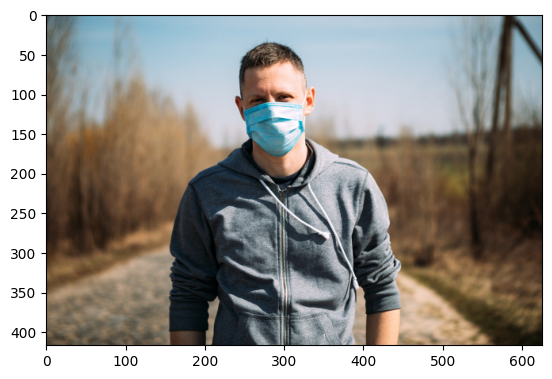

In [12]:
image_path = 'tests/images/masked.jpg'

plt.imshow(Image.open(image_path));

In [13]:
%%time
try:
    with open(image_path, 'rb') as image_bytes:
        predictions = mask_model.detect(image_bytes)
except cpai.CodeProjectAIException as exc:
    print(exc)

CPU times: total: 0 ns
Wall time: 351 ms


In [14]:
predictions

[{'confidence': 0.9385422468185425,
  'label': 'person',
  'x_min': 151,
  'y_min': 31,
  'x_max': 450,
  'y_max': 415}]